In [1]:
import spacy 
import pandas as pd
import re
import string
import numpy as np

In [2]:
#load model
nlp = spacy.load("C:\\Users\\User\\Desktop\\kelvin\\model")

#punctuation removal
punct = string.punctuation

In [3]:
#check pipeline
nlp.pipeline

[('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1d2c4225bc8>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1d2c3a76ca8>),
 ('lemmatizer', <spacy.pipeline.lemmatizer.Lemmatizer at 0x1d2c4249b88>)]

In [4]:
#data preprocessing
df = pd.read_csv("C:/Users/User/Desktop/twitter1.csv")
df['tweets'] = df['tweets'].astype(str)
df.head()

,tweets,sentiment
0,"Bersatu kita teguh, bercerai kita roboh.",Neutral
1,semuanya bersatu Bersatu Indonesia Kuat,Neutral
2,Dulu aku Jenis yang Tak suka sgt tgk mp-mp sho...,Negative
3,Kini360: Pengamal media Kelantan terima dos pe...,Neutral
4,Kini360: Sabah lanjutkan PKP 3.0 hingga 28 Jun...,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

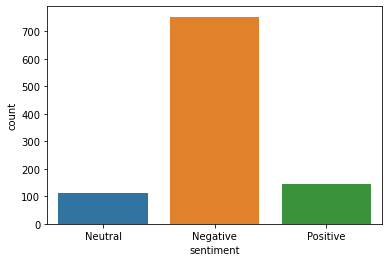

In [23]:
import seaborn as sns

sns.countplot(x='sentiment', data=df)

positive=df[df['sentiment']=='Positive'].tweets
neutral=df[df['sentiment']=='Neutral'].tweets
negative=df[df['sentiment']=='Negative'].tweets

positive.astype(str)

import matplotlib.pyplot as plt
from wordcloud import WordCloud 
data_neg = (df['tweets'])[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

In [6]:
#remove url,mention,hash from the review

def cleaning(review):
    return re.sub('((www.[^s]+)|(https:t[^s]+)|(http:t[^s]+)|(https://t[^s]+)|(http: t[^s]+)|(https: t[^s]+))|(#.*?(?=\s|$))|(@.*?(?=\s|$))',' ',review)

#extract hash from review

def extracthash(review):
    word = re.findall(r'(#.*?(?=\s|$))',review)
    return " ".join(word)

#extract mention from review

def extractmention(review):
    word = re.findall(r'(@.*?(?=\s|$))',review)
    return " ".join(word)

#remove punctuation
def removepunct(review):
    return re.sub(r"[,.;@#?!&$_]+\ *", " ", review)

#clean duplicate word
def cleanduplicate(review):
    return re.sub(r'(.)1+', r'1', review)

#clean number
def cleannumber(review):
    return re.sub('[0-9]+', '', review)

In [7]:
#create new column

df["tweets"] = df["tweets"].apply(lambda review: cleaning(review))
df["tweets"] = df["tweets"].apply(lambda review: removepunct(review))
df["tweets"] = df["tweets"].apply(lambda review: cleanduplicate(review))
df["tweets"] = df["tweets"].apply(lambda review: cleannumber(review))
df.head()

,tweets,sentiment
0,Bersatu kita teguh bercerai kita roboh,Neutral
1,semuanya bersatu Bersatu Indonesia Kuat,Neutral
2,Dulu aku Jenis yang Tak suka sgt tgk mp-mp sho...,Negative
3,Kini: Pengamal media Kelantan terima dos perta...,Neutral
4,Kini: Sabah lanjutkan PKP hingga Jun,Negative


In [133]:
df.to_csv("testremove2.csv",index=False)

In [144]:
df = df.drop(['mention','hashtag'], axis = 1)

In [8]:
df

,tweets,sentiment
0,Bersatu kita teguh bercerai kita roboh,Neutral
1,semuanya bersatu Bersatu Indonesia Kuat,Neutral
2,Dulu aku Jenis yang Tak suka sgt tgk mp-mp sho...,Negative
3,Kini: Pengamal media Kelantan terima dos perta...,Neutral
4,Kini: Sabah lanjutkan PKP hingga Jun,Negative
...,...,...
1004,Kerajaan kita bukan serba boleh tapi serba bod...,Negative
1005,Sudah sudah la kak mas woi Kamu tahu tak semua...,Negative
1006,Nape nak kena tampal gambar Dia pulak Guna dui...,Negative
1007,Bendera putih tu bukannya nak harap bantuan ke...,Negative


In [9]:
#stopword
dfsw = pd.read_csv("C:\\Users\\User\\Desktop\\spacy\\Untitled Folder\\scp_stopwords.csv")
sw=[]
for i in range(len(dfsw['stopword'])):
    sw.append(dfsw['stopword'][i])
    
stopwords = list(sw)

In [10]:
#tokenize for text classification
def datacleaning(review):
    doc=nlp(review)
    
    tokens = []
    for token in doc:
        temp = token.lemma_.lower().strip()
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

df["tweets"] = df["tweets"].apply(lambda review: datacleaning(review))

df.to_csv("321.csv")

df = pd.read_csv("321.csv")
df = df.dropna()

In [12]:
datacleaning("unifi: tahi terima_kasih bebas umobile laju unifi pukimak menyapu adalah")

['unifi',
 'tahi',
 'terima_kasih',
 'bebas',
 'umobile',
 'laju',
 'unifi',
 'teruk',
 'sapu']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC

In [14]:
#vectorization feature engineering(TF-IDF)
tfidf = TfidfVectorizer(tokenizer = datacleaning)

In [15]:
X = df['tweets']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [16]:
X

0                 Bersatu kita teguh bercerai kita roboh 
1                 semuanya bersatu Bersatu Indonesia Kuat
2       Dulu aku Jenis yang Tak suka sgt tgk mp-mp sho...
3       Kini: Pengamal media Kelantan terima dos perta...
4               Kini: Sabah lanjutkan PKP   hingga  Jun  
                              ...                        
1004    Kerajaan kita bukan serba boleh tapi serba bod...
1005    Sudah sudah la kak mas woi Kamu tahu tak semua...
1006    Nape nak kena tampal gambar Dia pulak Guna dui...
1007    Bendera putih tu bukannya nak harap bantuan ke...
1008    Menggelabah masing-masing nak beraya kan Lepas...
Name: tweets, Length: 1009, dtype: object

In [153]:
X_train.shape, X_test.shape

((807,), (202,))

In [20]:
from sklearn import svm

classifier = LinearSVC()

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.801980198019802


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.85      0.97      0.90       153
     Neutral       0.42      0.24      0.30        21
    Positive       0.60      0.32      0.42        28

    accuracy                           0.80       202
   macro avg       0.62      0.51      0.54       202
weighted avg       0.77      0.80      0.77       202



C:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


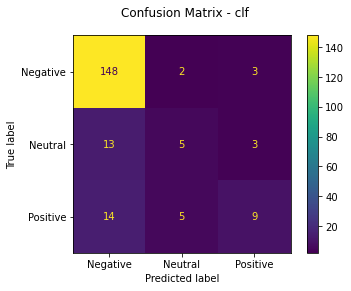

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(clf, X_test, y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix - clf")
plt.show()

In [157]:
for(sample,pred) in zip(X_test,y_pred):
    print(sample,"Prediction=>", pred)

Klau kau sedekat guna duit kau orang tak persoal ni kau sedekah guna duit kerajaan bodoh duit rakyat bagi la   Prediction=> Negative
Hello  Boleh suruh   tu tanggung semua ni Kaut untung Kerajaan pulak nak kena tanggung Wayang apa ni h   Prediction=> Negative
Dulu nampak gak divide puak sokong kerajaan puak tak sokong kerajaan Skang takde divide dah Baik orang bandar or   Prediction=> Negative
Ahli Parlimen Wangsa Maju anjur kempen pendaftaran pengesahan vaksinasi  sJ Prediction=> Negative
 study tour kerajaan hindu buddha bukan au tapi mirip au let's go and selamat berimajinasi sLSEG Prediction=> Negative
  Ini kebenaran la wahai ketereh memang kerajaan gagal dlm segenap sudut Prediction=> Negative
Finally production client terganggu sebab pkp bodoh kerajaan ni Babi  Prediction=> Negative
  x pasti jangan kongsi org tgh berkobar dgn cite presiden hang kata pm dari kalangan MP Umno Prediction=> Negative
Si khairi tu mmg tak blh prcaya punya org Punyalah dia benci kerajaan Dia akan hasu

In [162]:
clf.predict(['UMNO'])

array(['Negative'], dtype=object)

In [163]:
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()

nb = Pipeline([('tfidf', tfidf), ('nb', classifier1)])
nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function datacleaning at 0x000001B3C59E26A8>)),
                ('nb', MultinomialNB())])

In [164]:
y_pred = nb.predict(X_test)

In [165]:
accuracy_score(y_pred,y_test)

0.7574257425742574

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


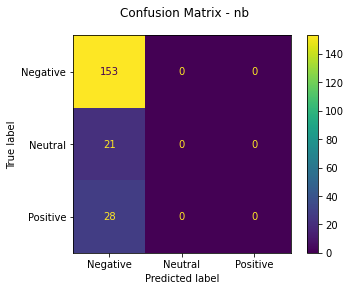

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(nb, X_test, y_test, display_labels=nb.classes_)
fig.figure_.suptitle("Confusion Matrix - nb")
plt.show()